In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.sex=le.fit_transform(data.sex)
data.smoker=le.fit_transform(data.smoker)
data.region=le.fit_transform(data.region)

In [8]:
features,target=data.drop(["charges"],axis='columns'),data["charges"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
model.score(x_train,y_train)

0.7670544712495903

In [12]:
pred=model.predict(x_train)
pred_actual=pd.DataFrame({"Pred":pred,"Actual":y_train})
pred_actual.head()

,Pred,Actual
507,1632.154125,3077.0955
374,3459.457121,1391.5287
1061,11714.178713,11554.2236
332,13691.410966,13429.0354
1051,13204.429380,14394.5579


In [13]:
error=y_train-pred
np.mean(error)

4.6545728849612665e-12

(array([ 98., 119., 524., 147., 123.,  14.,  21.,  13.,  10.,   1.]),
 array([-11473.01174952,  -7374.58986209,  -3276.16797465,    822.25391278,
          4920.67580022,   9019.09768765,  13117.51957509,  17215.94146252,
         21314.36334996,  25412.7852374 ,  29511.20712483]),
 <BarContainer object of 10 artists>)

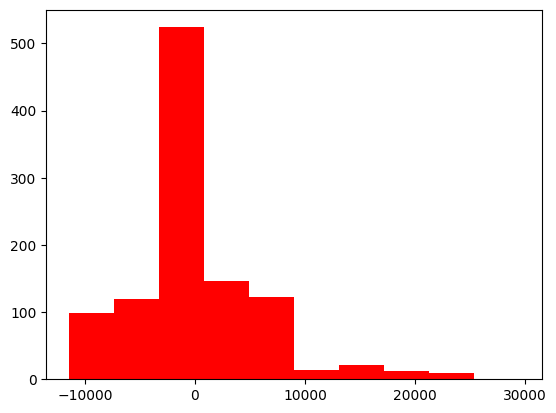

In [14]:
plt.hist(error,color='r')

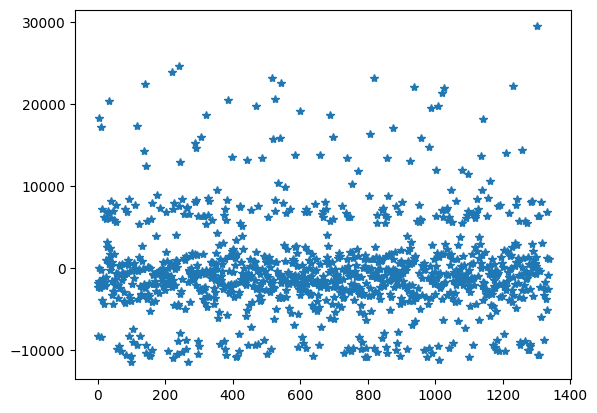

In [15]:
plt.plot(error,"*")

<Axes: xlabel='Actual', ylabel='Pred'>

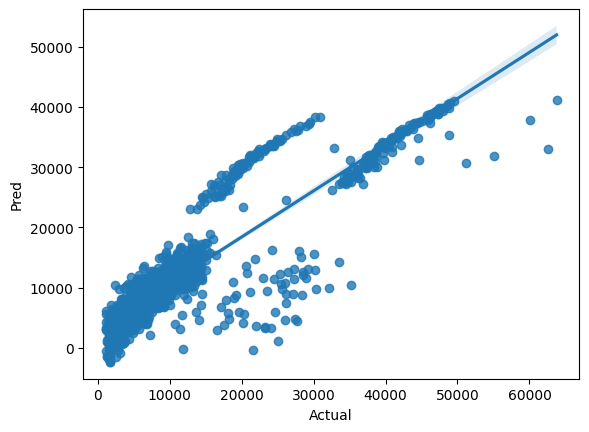

In [18]:
sns.regplot(x=pred_actual.Actual,y=pred_actual.Pred)

In [19]:
x=np.array(pred_actual)

In [25]:
from sklearn.covariance import EllipticEnvelope
elpenv=EllipticEnvelope(contamination=0.05)
pred=elpenv.fit_predict(x)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
  l1=list(pred)
  l1.count(-1) #count of outliers

54

In [27]:
index_for_outlier=np.where(pred==-1)
print("Outlier indexes are: ",index_for_outlier)
print()

Outlier indexes are:  (array([   5,   68,  111,  119,  130,  228,  258,  277,  280,  316,  332,
        341,  352,  356,  387,  404,  454,  470,  498,  519,  581,  596,
        606,  613,  625,  639,  668,  672,  680,  686,  692,  700,  762,
        796,  814,  816,  821,  831,  837,  838,  850,  867,  877,  899,
        906,  910,  941,  949,  964,  981,  996, 1031, 1034, 1043]),)



In [28]:
outlier_values=x[index_for_outlier]
outlier_values

array([[39912.25001447, 48824.45      ],
       [31163.40149933, 44585.45587   ],
       [14304.44469742, 33471.97189   ],
       [ 9734.9890813 , 30284.64294   ],
       [ 3375.83076353, 24059.68019   ],
       [41115.03991087, 63770.42801   ],
       [38895.89278322, 47305.305     ],
       [38600.542102  , 46151.1245    ],
       [ 4597.70643276, 26018.95052   ],
       [38154.74604608, 46200.9851    ],
       [ 4536.35809515, 27724.28875   ],
       [ 4871.71624762, 27375.90478   ],
       [ 3384.56594525, 23241.47453   ],
       [38860.31736509, 46130.5265    ],
       [12893.6656925 , 30259.99556   ],
       [39215.4308908 , 46889.2612    ],
       [ -360.40152027, 21595.38229   ],
       [37284.06866259, 44423.803     ],
       [33081.66596517, 62592.87309   ],
       [10488.09666284, 35160.13457   ],
       [39675.20355795, 47462.894     ],
       [37666.23992272, 45008.9555    ],
       [ 3503.57716983, 23288.9284    ],
       [31953.81251767, 55135.40209   ],
       [30790.87

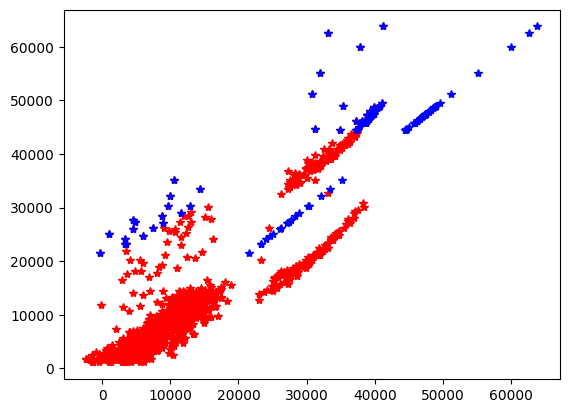

In [29]:
plt.plot(x[:,0],x[:,1],"*",color="r")
plt.plot(outlier_values,outlier_values[:,1],"*",color="b")